In [32]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [44]:
def get_data(filename, filt=np.mean):
    with open(filename) as f:
        csv_reader = csv.reader(f)
        csv_reader = list(csv_reader)
    number_of_vnfs = [x[0] for x in csv_reader[1:]]
    process_time = [x[1:11] for x in csv_reader[1:]]
    memory_usage = [x[11:21] for x in csv_reader[1:]]
    memory_usage_ps = [x[21:31] for x in csv_reader[1:]]

    process_time = [list(map(float, x)) for x in process_time]
    process_time = [filt(x) for x in process_time]

    memory_usage = [list(map(int, x)) for x in memory_usage]
    memory_usage = [filt(x) for x in memory_usage]

    memory_usage_ps = [list(map(int, x)) for x in memory_usage_ps]
    memory_usage_ps = [filt(x) for x in memory_usage_ps]

    return number_of_vnfs, process_time, memory_usage, memory_usage_ps

In [45]:
t_5g = get_data("results_eu.5gtango_valid_level_t.csv")
skip_5g = get_data("results_eu.5gtango_valid_level_skip.csv")

t_osm = get_data("results_eu.etsi.osm_valid_level_t.csv")
skip_osm = get_data("results_eu.etsi.osm_valid_level_skip.csv")

In [37]:
def plot_pt_mu(n, pt, mu, mu_ps):
    plt.plot(n, pt)
    plt.show()
    plt.plot(n, mu)
    plt.show()
    plt.plot(n, mu_ps)
    plt.show()

39

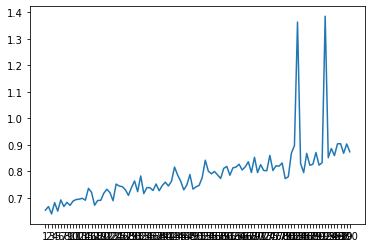

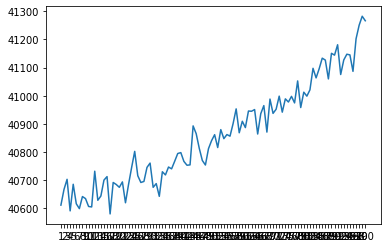

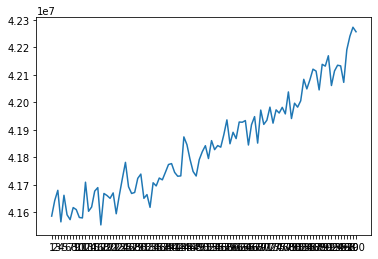

In [46]:
plot_pt_mu(*t_5g)

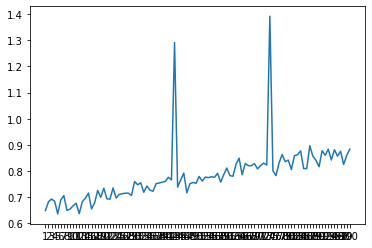

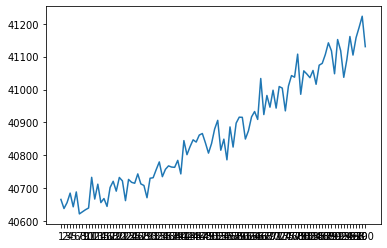

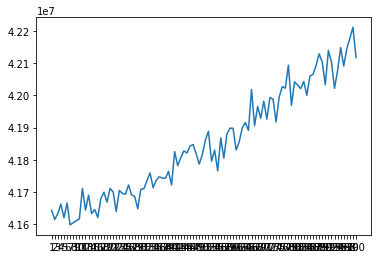

In [47]:
plot_pt_mu(*skip_5g)

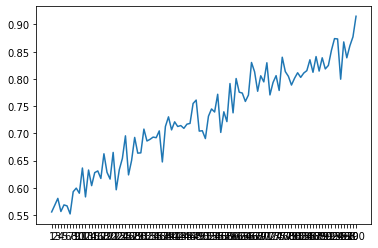

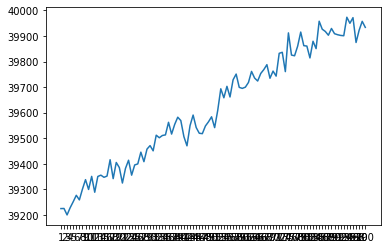

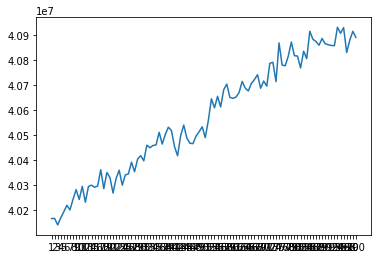

In [48]:
plot_pt_mu(*t_osm)

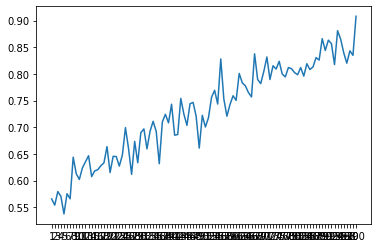

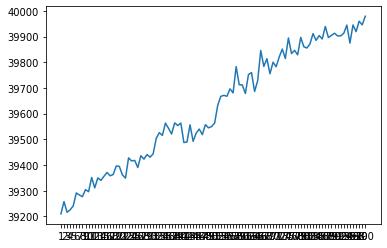

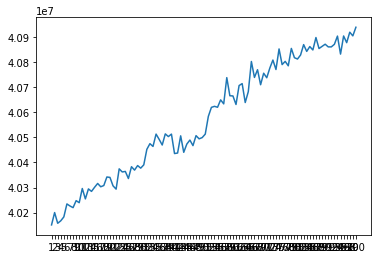

In [43]:
plot_pt_mu(*skip_osm)

In [50]:
t_5g = get_data("results_eu.5gtango_valid_level_t.csv", np.median)
skip_5g = get_data("results_eu.5gtango_valid_level_skip.csv", np.median)

t_osm = get_data("results_eu.etsi.osm_valid_level_t.csv", np.median)
skip_osm = get_data("results_eu.etsi.osm_valid_level_skip.csv", np.median)

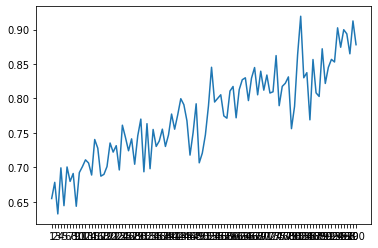

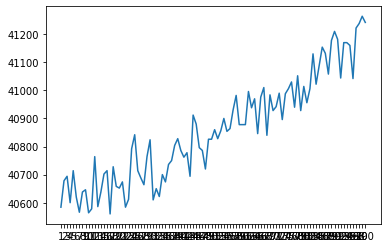

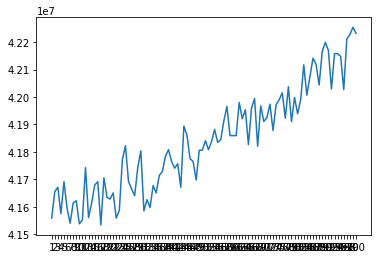

In [51]:
plot_pt_mu(*t_5g)

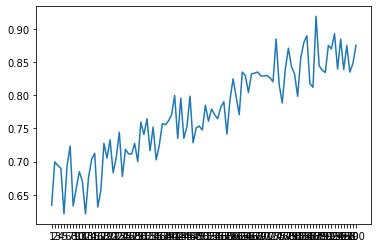

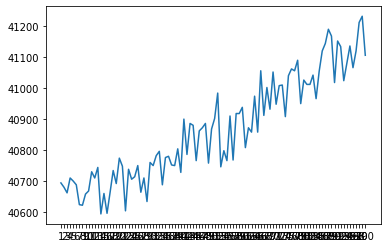

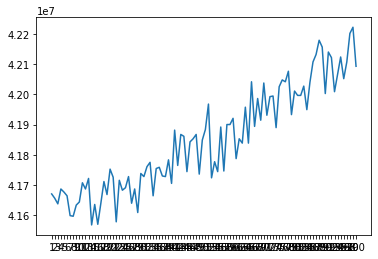

In [52]:
plot_pt_mu(*skip_5g)

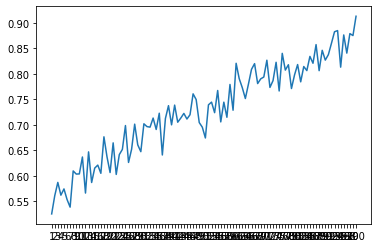

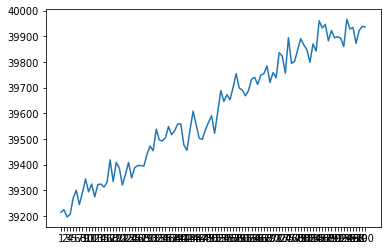

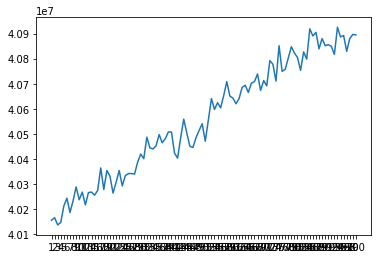

In [53]:
plot_pt_mu(*t_osm)

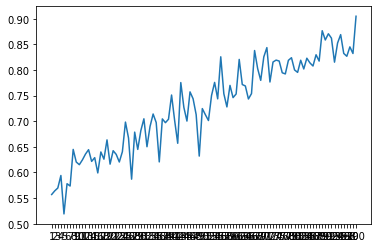

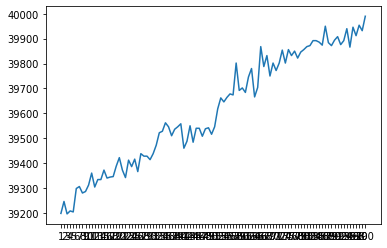

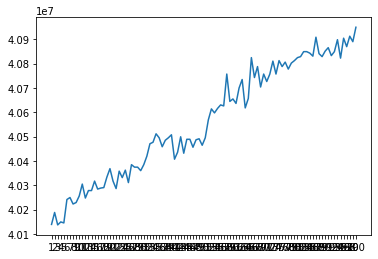

In [54]:
plot_pt_mu(*skip_osm)

In [55]:
t_5g = get_data("results_eu.5gtango_valid_level_t.csv", lambda x: x[-1])
skip_5g = get_data("results_eu.5gtango_valid_level_skip.csv", lambda x: x[-1])

t_osm = get_data("results_eu.etsi.osm_valid_level_t.csv", lambda x: x[-1])
skip_osm = get_data("results_eu.etsi.osm_valid_level_skip.csv", lambda x: x[-1])

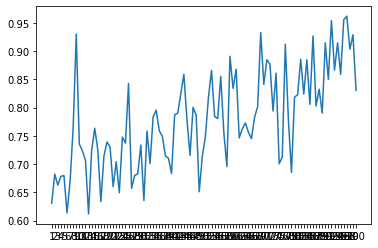

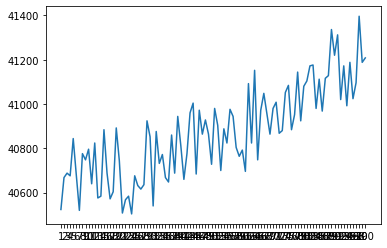

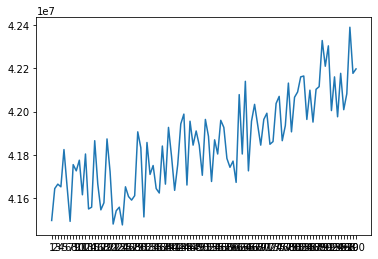

In [56]:
plot_pt_mu(*t_5g)

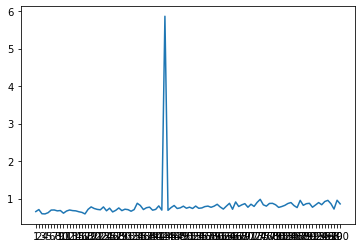

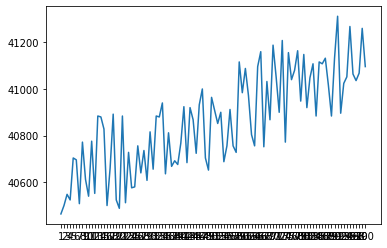

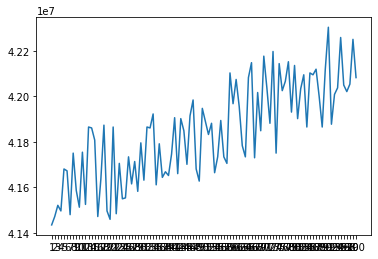

In [57]:
plot_pt_mu(*skip_5g)

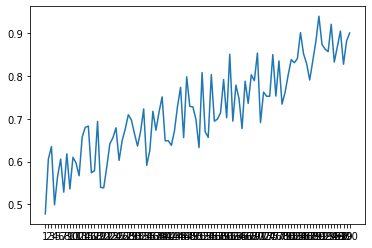

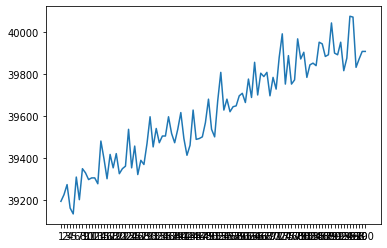

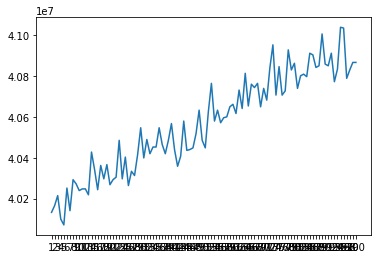

In [58]:
plot_pt_mu(*t_osm)

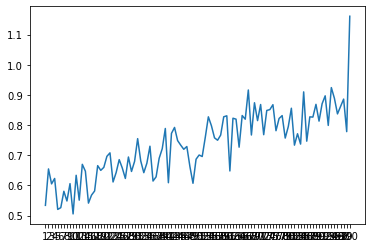

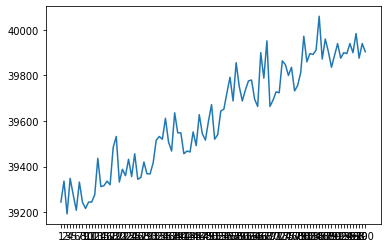

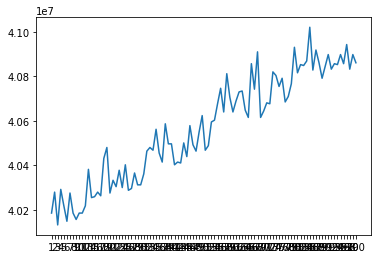

In [59]:
plot_pt_mu(*skip_osm)